In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/data.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [4]:
df.groupby('Diabetes_binary')['Diabetes_binary'].count()

Diabetes_binary
0.0    35346
1.0    35346
Name: Diabetes_binary, dtype: int64

In [5]:
# we will standardize the non-binary variables, thankfully all variables are numerical.
# Checking for binary only
for column in df:
    print('number of unique values for' ,column,': ',len(df[column].unique()))

number of unique values for Diabetes_binary :  2
number of unique values for HighBP :  2
number of unique values for HighChol :  2
number of unique values for CholCheck :  2
number of unique values for BMI :  80
number of unique values for Smoker :  2
number of unique values for Stroke :  2
number of unique values for HeartDiseaseorAttack :  2
number of unique values for PhysActivity :  2
number of unique values for Fruits :  2
number of unique values for Veggies :  2
number of unique values for HvyAlcoholConsump :  2
number of unique values for AnyHealthcare :  2
number of unique values for NoDocbcCost :  2
number of unique values for GenHlth :  5
number of unique values for MentHlth :  31
number of unique values for PhysHlth :  31
number of unique values for DiffWalk :  2
number of unique values for Sex :  2
number of unique values for Age :  13
number of unique values for Education :  6
number of unique values for Income :  8


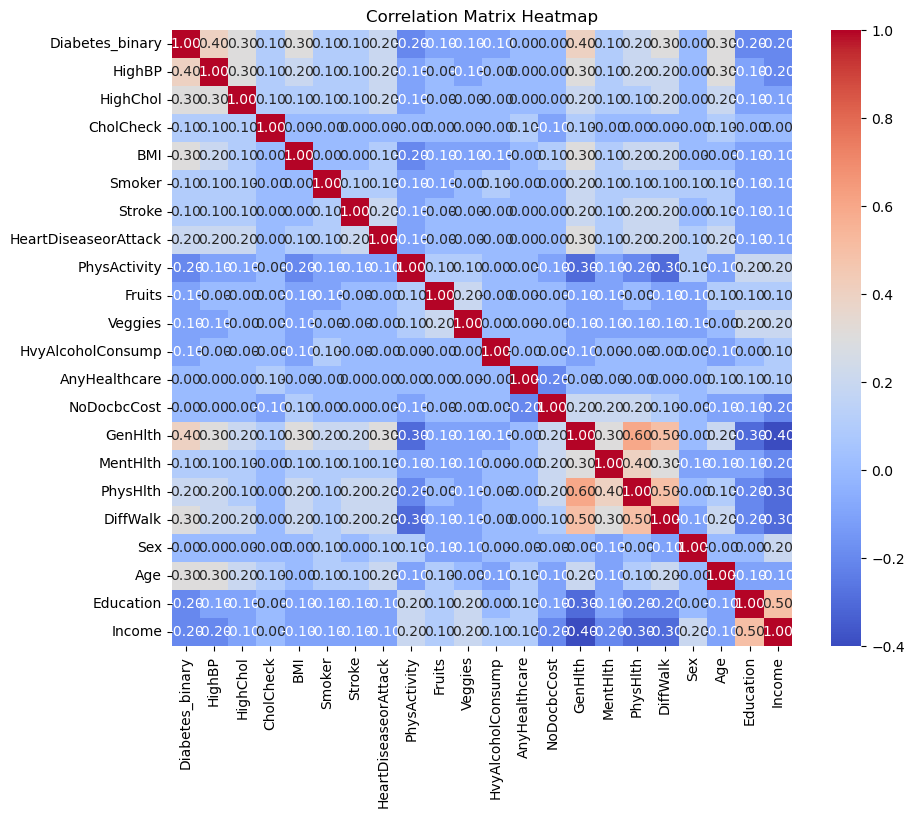

In [7]:
# Calculate the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix.round(1), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [8]:
mean_groups = df.groupby('Diabetes_binary').mean().T
mean_groups['delta'] = mean_groups[1.0]-mean_groups[0.0]
mean_groups.sort_values(by='delta', ascending=False)

Diabetes_binary,0.0,1.0,delta
PhysHlth,3.666355,7.954479,4.288123
BMI,27.769960,31.944011,4.174051
Age,7.789057,9.379053,1.589996
MentHlth,3.042268,4.461806,1.419538
GenHlth,2.383183,3.290981,0.907797
HighBP,0.374243,0.752674,0.378430
HighChol,0.381288,0.670118,0.288830
DiffWalk,0.134244,0.371216,0.236972
HeartDiseaseorAttack,0.072738,0.222882,0.150144
Smoker,0.432326,0.518220,0.085894


<h2>Feature Interactions</h2>

When predicting diabetes, interaction features can capture relationships between predictors that might not be evident when considering each variable individually.

### 1. **HighBP × HighChol**
- **Justification**: Hypertension (high blood pressure) and high cholesterol often coexist and together significantly elevate the risk of cardiovascular diseases, which are strongly linked to diabetes. This interaction could provide additional insight into patients with compounded risk factors.

---

### 2. **BMI × PhysActivity**
- **Justification**: Body mass index (BMI) is a strong predictor of diabetes risk, but its impact may vary depending on physical activity levels. For instance, individuals with a high BMI who are physically active might have a lower risk than inactive individuals with a similar BMI. Including this interaction would help the model differentiate between these cases.

---

### 3. **Age × DiffWalk**
- **Justification**: Difficulty walking can be a sign of physical decline, which is more common in older adults. The interaction between age and difficulty walking could provide unique information about mobility-related health deterioration and its association with diabetes.

---

### 4. **Fruits × Veggies**
- **Justification**: A combined measure of fruit and vegetable consumption might better capture dietary habits related to diabetes risk. Individually, these variables show health benefits, but their interaction could identify individuals with a comprehensive healthy diet.

---

### 5. **HighBP × Stroke**
- **Justification**: Hypertension is a leading cause of stroke, and both conditions share a relationship with diabetes. By combining these features, the model can better understand how the history of both conditions impacts diabetes risk.

---

### 6. **HvyAlcoholConsump × MentHlth**
- **Justification**: Heavy alcohol consumption can negatively impact mental health, leading to behaviors and lifestyle choices that increase diabetes risk. Including this interaction could highlight individuals whose diabetes risk is influenced by mental and lifestyle factors together.

---

### 7. **GenHlth × PhysHlth**
- **Justification**: General health perception often reflects physical health conditions. Combining these two variables can provide a more nuanced understanding of an individual’s overall health, which might influence their diabetes risk.

---

### 8. **Age × Education**
- **Justification**: Education level often impacts health literacy and lifestyle choices. By interacting with age, this feature could differentiate between older individuals who had different levels of education and their respective impacts on diabetes risk.

---

### 9. **Income × AnyHealthcare**
- **Justification**: Access to healthcare may depend on income, and this interaction could help identify how socio-economic status influences diabetes risk through healthcare access.

---

### 10. **Smoker × HeartDiseaseorAttack**
- **Justification**: Smoking and a history of heart disease or attack are both known to increase diabetes risk. The combination of these two factors could identify individuals with compounded lifestyle-related risk factors.


In [ ]:
df['HighBP_HighChol'] = df['HighBP'] * df['HighChol']
df['BMI_PhysActivity'] = df['BMI'] * df['PhysActivity']
df['Age_DiffWalk'] = df['Age'] * df['DiffWalk']
df['Fruits_Veggies'] = df['Fruits'] * df['Veggies']
df['HighBP_Stroke'] = df['HighBP'] * df['Stroke']
df['HvyAlcoholConsump_MentHlth'] = df['HvyAlcoholConsump'] * df['MentHlth']
df['GenHlth_PhysHlth'] = df['GenHlth'] * df['PhysHlth']
df['Age_Education'] = df['Age'] * df['Education']
df['Income_AnyHealthcare'] = df['Income'] * df['AnyHealthcare']
df['Smoker_HeartDiseaseorAttack'] = df['Smoker'] * df['HeartDiseaseorAttack']


<h2>Remove Redundancy</h2>

In [ ]:
# to prevent overfitting with the new interaction features, we must normalize and do feature selection

In [9]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

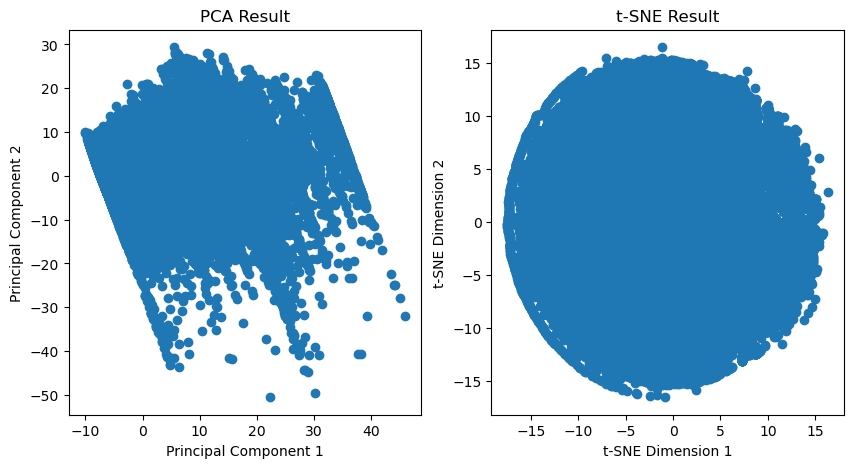

In [10]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)

# t-SNE
tsne = TSNE(n_components=2, perplexity=3, max_iter=300)
tsne_result = tsne.fit_transform(df)

# Visualization of reduced dimensions (PCA)
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')

# Visualization of reduced dimensions (t-SNE)
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Result')

plt.show()

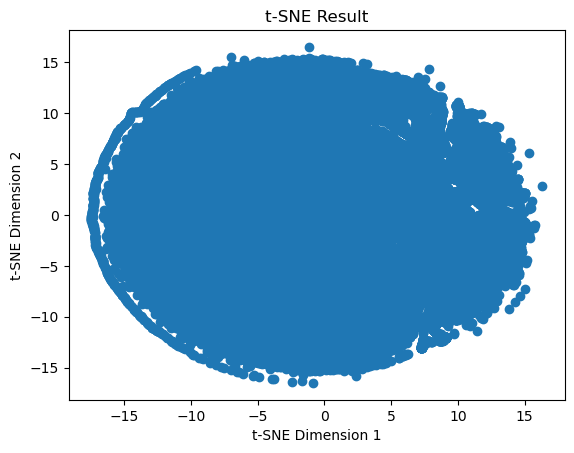

In [11]:
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Result')

plt.show()

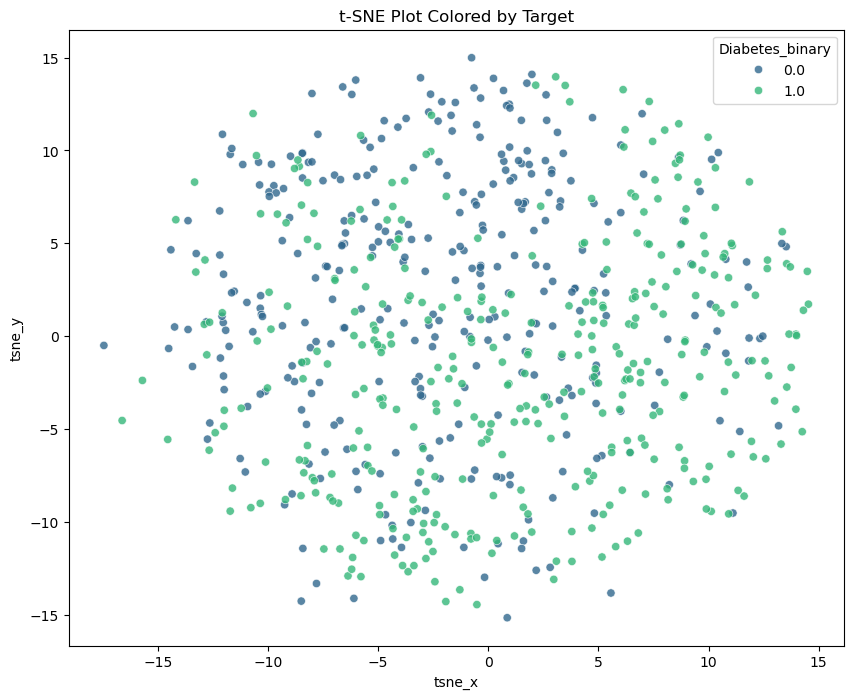

In [23]:
from sklearn.manifold import TSNE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
scaler = ColumnTransformer([
    ('scaler', StandardScaler(), 
    [
        'BMI',
        'GenHlth',
        'MentHlth',
        'PhysHlth',
        'Age',
        'Education',
        'Income'
    ])
    ], remainder='passthrough')

# Example DataFrame `df` with features and target
df_reduced = df.sample(frac=0.01, random_state=42)
features = df_reduced.drop(columns=['Diabetes_binary'])
target = df_reduced['Diabetes_binary']
features = scaler.fit_transform(features)
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features)

# Add the t-SNE results to the DataFrame
df_reduced['tsne_x'] = tsne_results[:, 0]
df_reduced['tsne_y'] = tsne_results[:, 1]

# Plot the t-SNE results, colored by the target column
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='tsne_x', y='tsne_y', 
    hue=target, 
    palette='viridis', 
    data=df, 
    legend='full', 
    alpha=0.8
)
plt.title('t-SNE Plot Colored by Target')
plt.show()
